# **PYTHON**

## 1. Write a Python program to create a list whose ith element is the maximum of the first i elements from a input list.

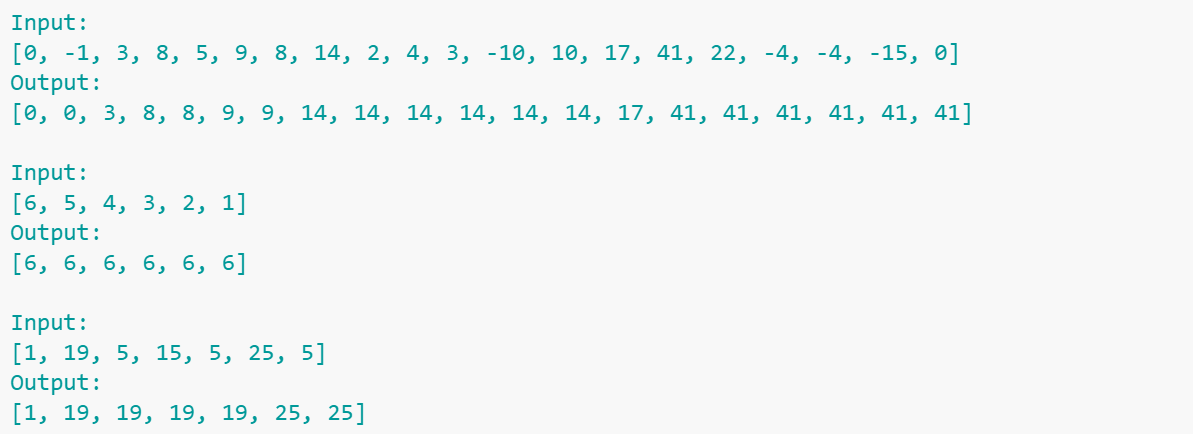

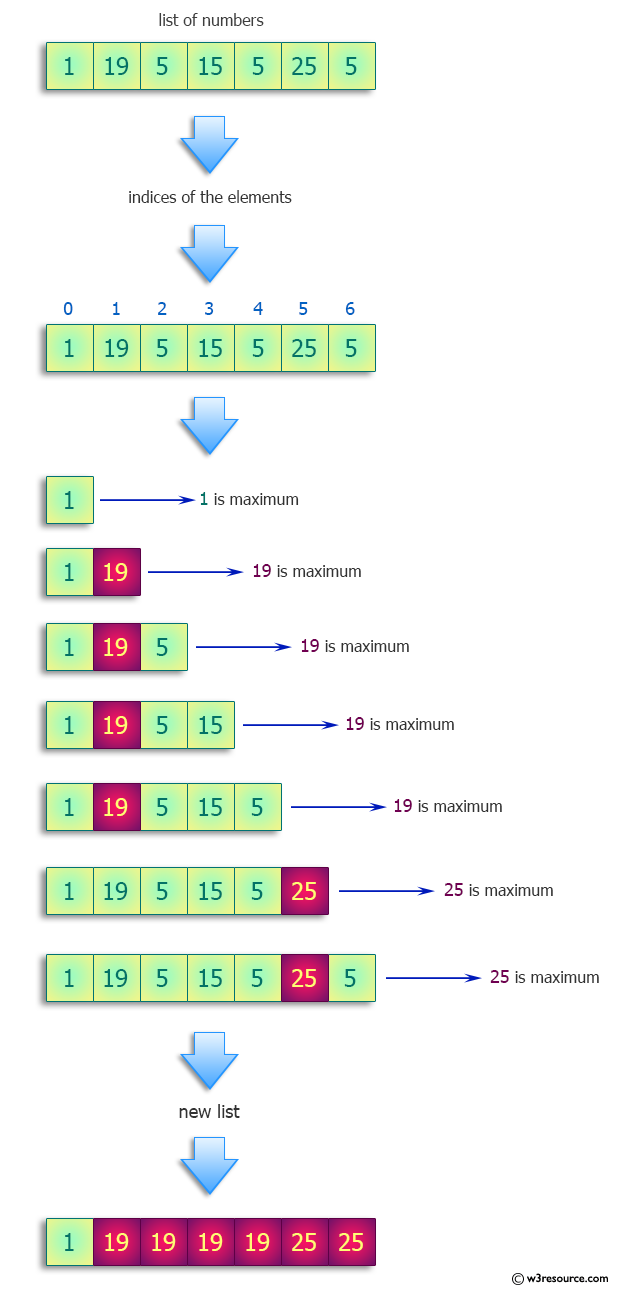

In [ ]:
# Write Your code here.
list1=input('enter numbers ' ).split(',')
def maximum(list1):
  list2=[int(list1[0])]
  for i in list1[1:]:
    if int(i) > int(list2[-1]):
       
       list2.append(int(i))
    else:
      list2.append(int(list2[-1]))
  return list2
maximum(list1)

enter numbers 1,19,5,15,5,25,5


[1, 19, 19, 19, 19, 25, 25]

## 2. Write a Python program to find the coordinates of a triangle with the given side lengths.

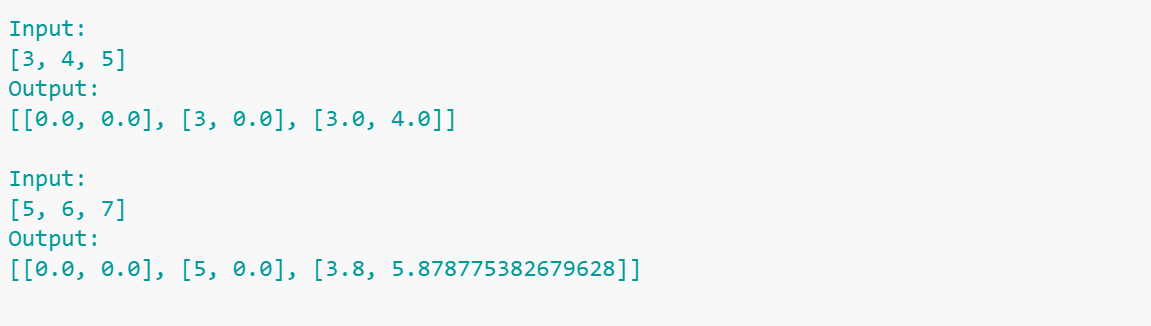

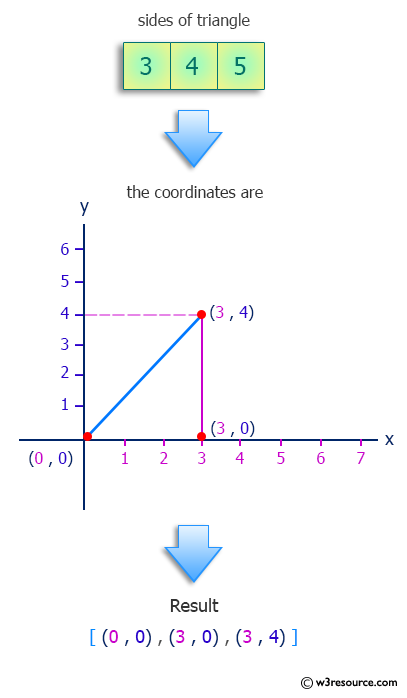

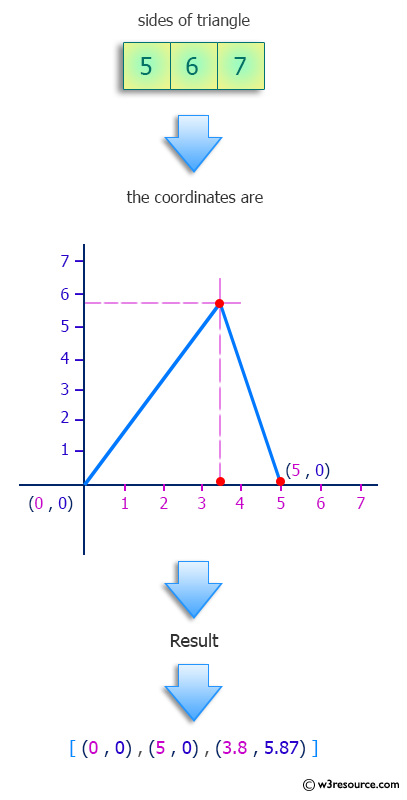

In [ ]:
# Write Your code here.
sides=[int(x) for x in input().split(",")]

def test(sides):
   a, b, c = sorted(sides)
   s = sum(sides) / 2 # semi-perimeter
   area = (s * (s - a) * (s - b) * (s - c)) ** 0.5 # Heron's formula
   y = 2 * area / a # height
   x = (c ** 2 - y ** 2) ** 0.5
   return [[0.0, 0.0], [a, 0.0], [x, y]]
test(sides)

3,4,5


[[0.0, 0.0], [3, 0.0], [3.0, 4.0]]

# **SQL**

## 3. From the following dataframes, write an SQL query to find the best seller by total sales price. Return distributor ID , If there is a tie, report them all.


**Create Dataframe 1:item**

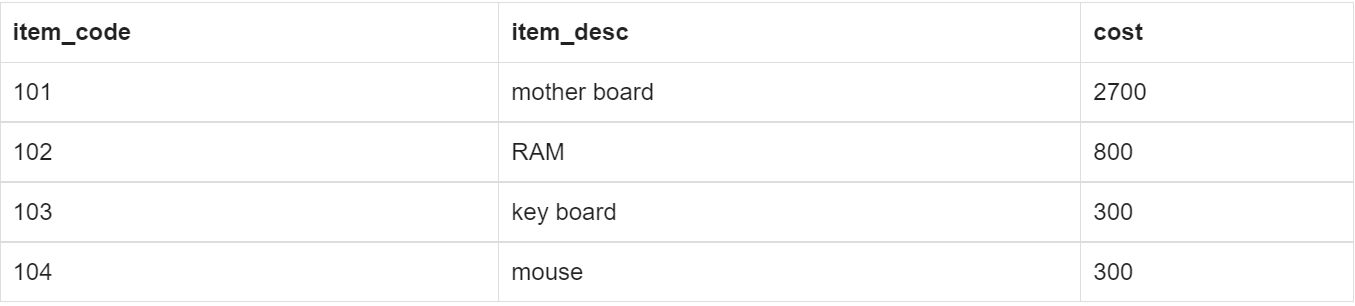

**Create Dataframe 2: sales_info**

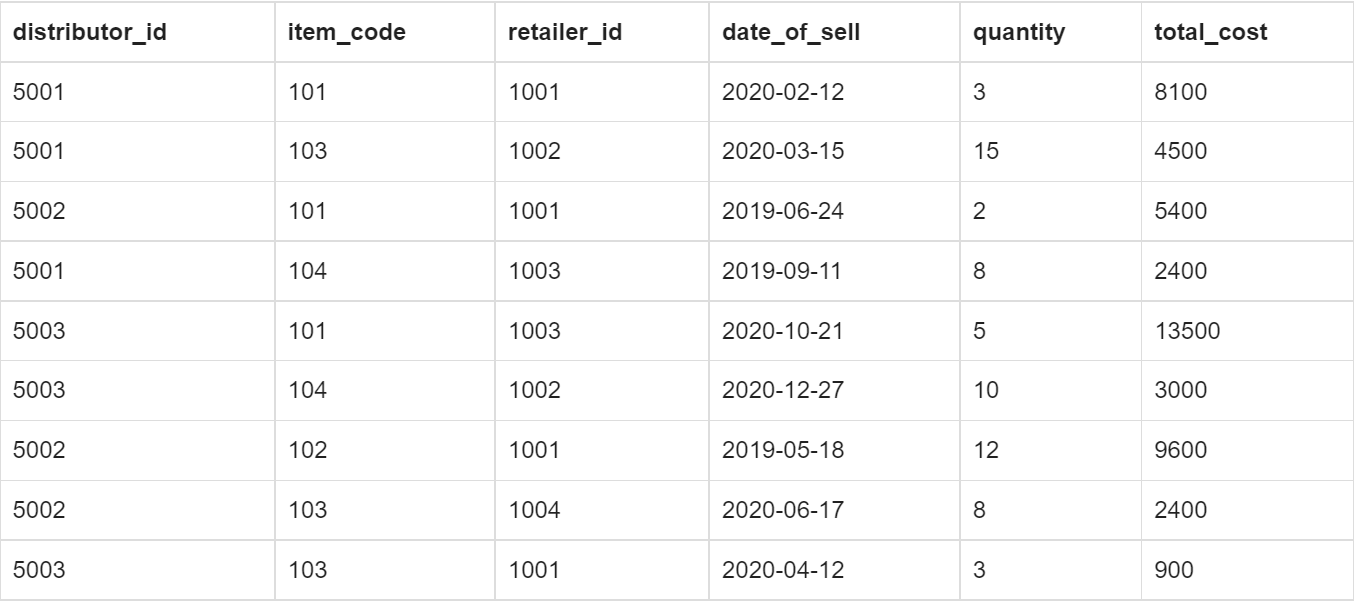

**Expected Output:**


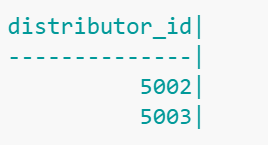

In [ ]:
# Install SQlite & Pandasql
!pip install db-sqlite3
!pip install pandasql

# Importing Libraries
import pandas as pd
import sqlite3
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals())


# Connection to DataBase
conn = sqlite3.connect('test5_database') 
c = conn.cursor()

# Create table
c.execute('''DROP TABLE IF EXISTS item;''')

c.execute('''CREATE TABLE item (
[item_code] INTEGER,
[item_desc] VARCHAR,
[cost]  INTEGER);''')


          
# Insert data into table          
c.execute('''INSERT INTO item VALUES(101,'mother board',	2700);''') 
c.execute('''INSERT INTO item VALUES(102,'RAM',	800);''') 
c.execute('''INSERT INTO item VALUES(103,'key board',300);''') 
c.execute('''INSERT INTO item VALUES(104,'mouse',300);''') 



# Create table
c.execute('''DROP TABLE IF EXISTS sales_info;''')

c.execute('''CREATE TABLE sales_info (
[distributor_id] INTEGER,
[item_code] INTEGER,
[retailer_id]  INTEGER,
[date_of_sell] DATE,
[quantity] INTEGER,
[total_cost] INTEGER);''')


          
# Insert data into table          
c.execute('''INSERT INTO sales_info VALUES(5001,101,1001,'2020-02-12',3,8100);''')
c.execute('''INSERT INTO sales_info VALUES(5001,103,1002,'2020-03-15',15,4500);''')
c.execute('''INSERT INTO sales_info VALUES(5002,101,1001,'2019-06-24',2,5400);''')
c.execute('''INSERT INTO sales_info VALUES(5001,104,1003,'2019-09-11',8,2400);''')
c.execute('''INSERT INTO sales_info VALUES(5003,101,1003,'2020-10-21',5,13500);''')
c.execute('''INSERT INTO sales_info VALUES(5003,104,1002,'2020-12-27',10,3000);''')
c.execute('''INSERT INTO sales_info VALUES(5002,102,1001,'2019-05-18',12,9600);''')
c.execute('''INSERT INTO sales_info VALUES(5002,103,1004,'2020-06-17',8,2400);''')
c.execute('''INSERT INTO sales_info VALUES(5003,103,1001,'2020-04-12',3,900);''')

conn.commit()

# Get DataFrame
conn = sqlite3.connect('test5_database') 
item = pd.read_sql_query ('''SELECT * FROM item''',conn)
sales_info = pd.read_sql_query ('''SELECT * FROM sales_info''',conn)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 171 kB 6.6 MB/s 
  Created wheel for db-sqlite3: filename=db_sqlite3-0.0.1-py3-none-any.whl size=1794 sha256=d9c6a2442b73e362fc5a11fae5b264b20caac0cb6003086302e7b4ff782c1021
  Stored in directory: /root/.cache/pip/wheels/02/38/d5/2f54461050571bf5330fee2a37ab1c9b5e7540b0572f1acdab
  Created wheel for db: filename=db-0.1.1-py3-none-any.whl size=3895 sha256=b76a5ec8333a48954cea1138984bbaa657731116f4cf2dea681f0c73ce37bae1
  Stored in directory: /root/.cache/pip/wheels/8e/97/82/741d2b360507411ec233d0280d7371faa94b03bde834e4a9be
  Created wheel for antiorm: filename=antiorm-1.2.1-py3-none-any.whl size=31679 sha256=19887750986e4efb96c1fbc7f450577ea89a256e6b8e5007e8d1543fda24c560
  Stored in directory: /root/.cache/pip/wheels/c5/43/70/e9729370cfff40c49d3e3d05377d54b3ecd71f64e62341ea80
Successfully built db-sqlite3 db antiorm
Looking in indexes: https://pypi

In [ ]:
mysql('select distributor_id as cost from sales_info left join item on sales_info.item_code==item.item_code group by sales_info.distributor_id having sum(total_cost)=(select  sum(total_cost) as cost from sales_info left join item on sales_info.item_code==item.item_code group by sales_info.distributor_id order by cost desc limit 1)')

,cost
0,5002
1,5003


## 4. From the above dataframes, write a SQL query to find those retailers who have bought 'key board' but not 'mouse'. 
## Return retailer ID.

**Expected Output:** 

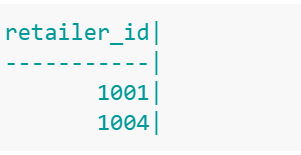

In [ ]:
# Write Your code here.
mysql('select distinct retailer_id from sales_info left join item on sales_info.item_code==item.item_code where sales_info.retailer_id not in (select retailer_id from sales_info left join item on sales_info.item_code==item.item_code where item.item_desc="mouse")')

,retailer_id
0,1001
1,1004


# **MATH**

## 5. You grow 20 crystals from a solution and measure the length of each crystal in millimeters. Here is your data:

## 9, 2, 5, 4, 12, 7, 8, 11, 9, 3, 7, 4, 12, 5, 4, 10, 9, 6, 9, 4

## Calculate the sample standard deviation of the length of the crystals.

**Solve this on a piece of paper and submit the image.**

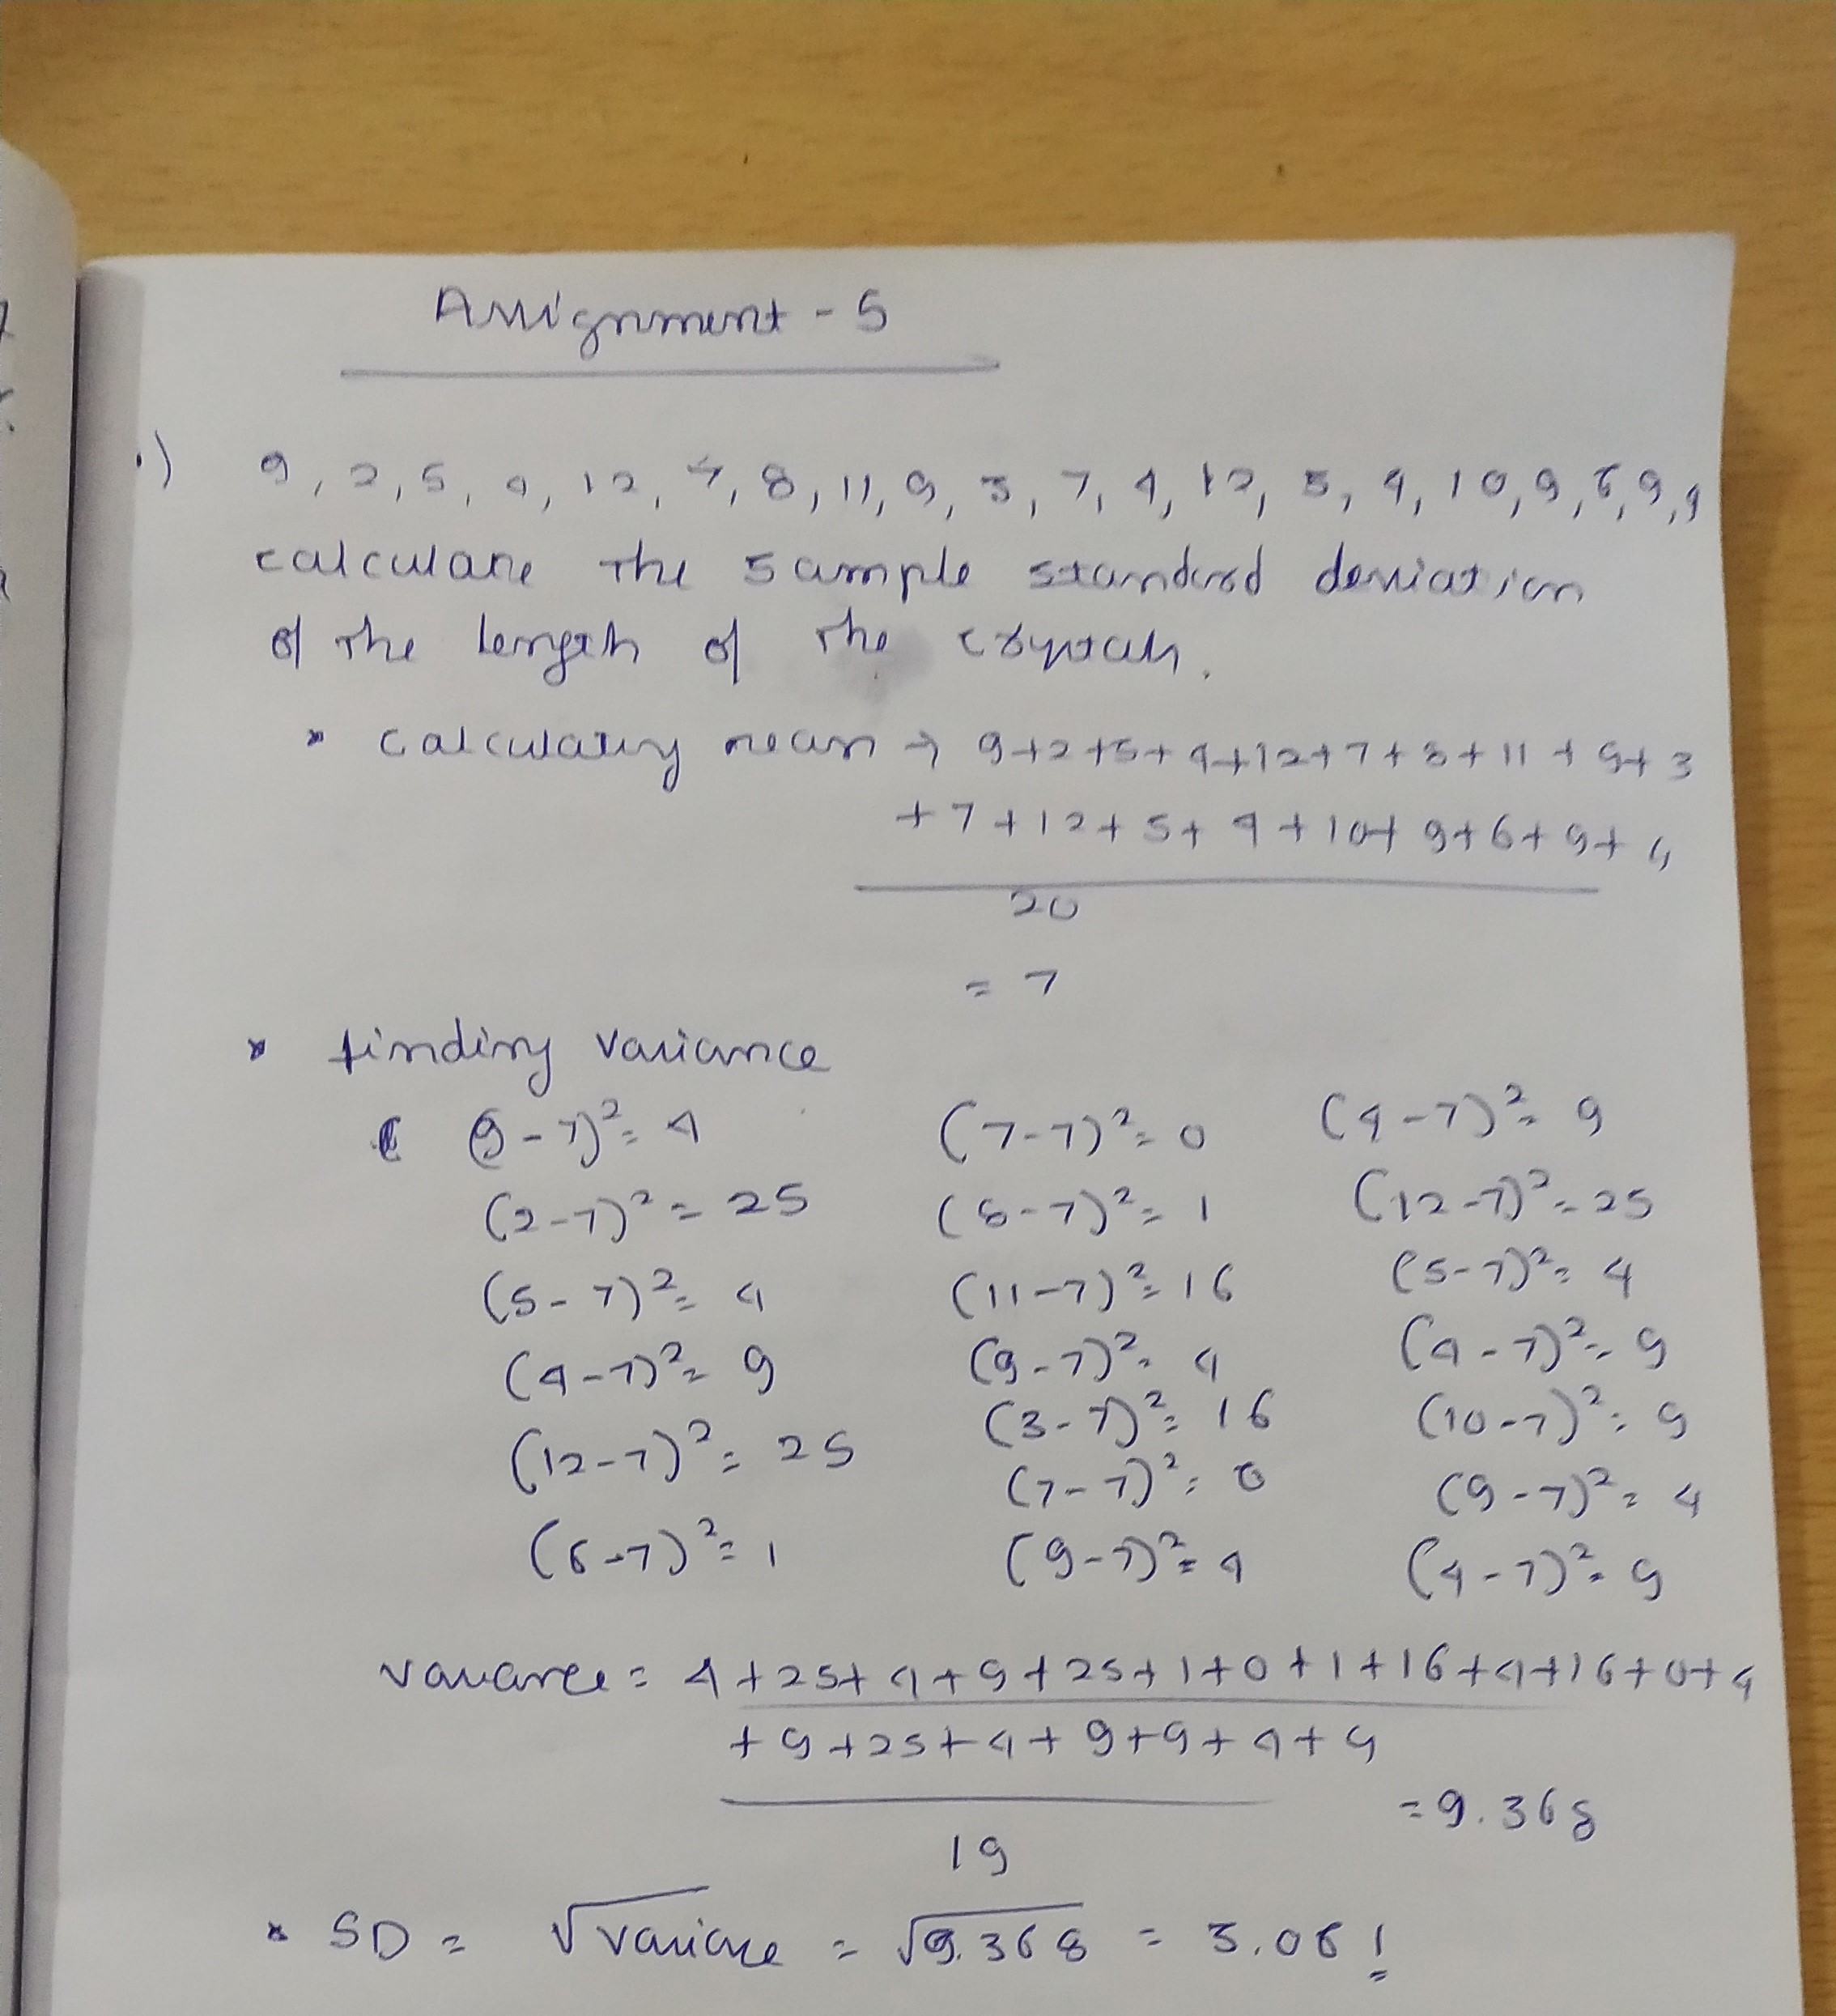Upload Your answer here.

## 6. Determine the interquartile range, lower outlier threshold and upper outlier threshold value for the first ten prime numbers.

**Solve this on a piece of paper and submit the image.**

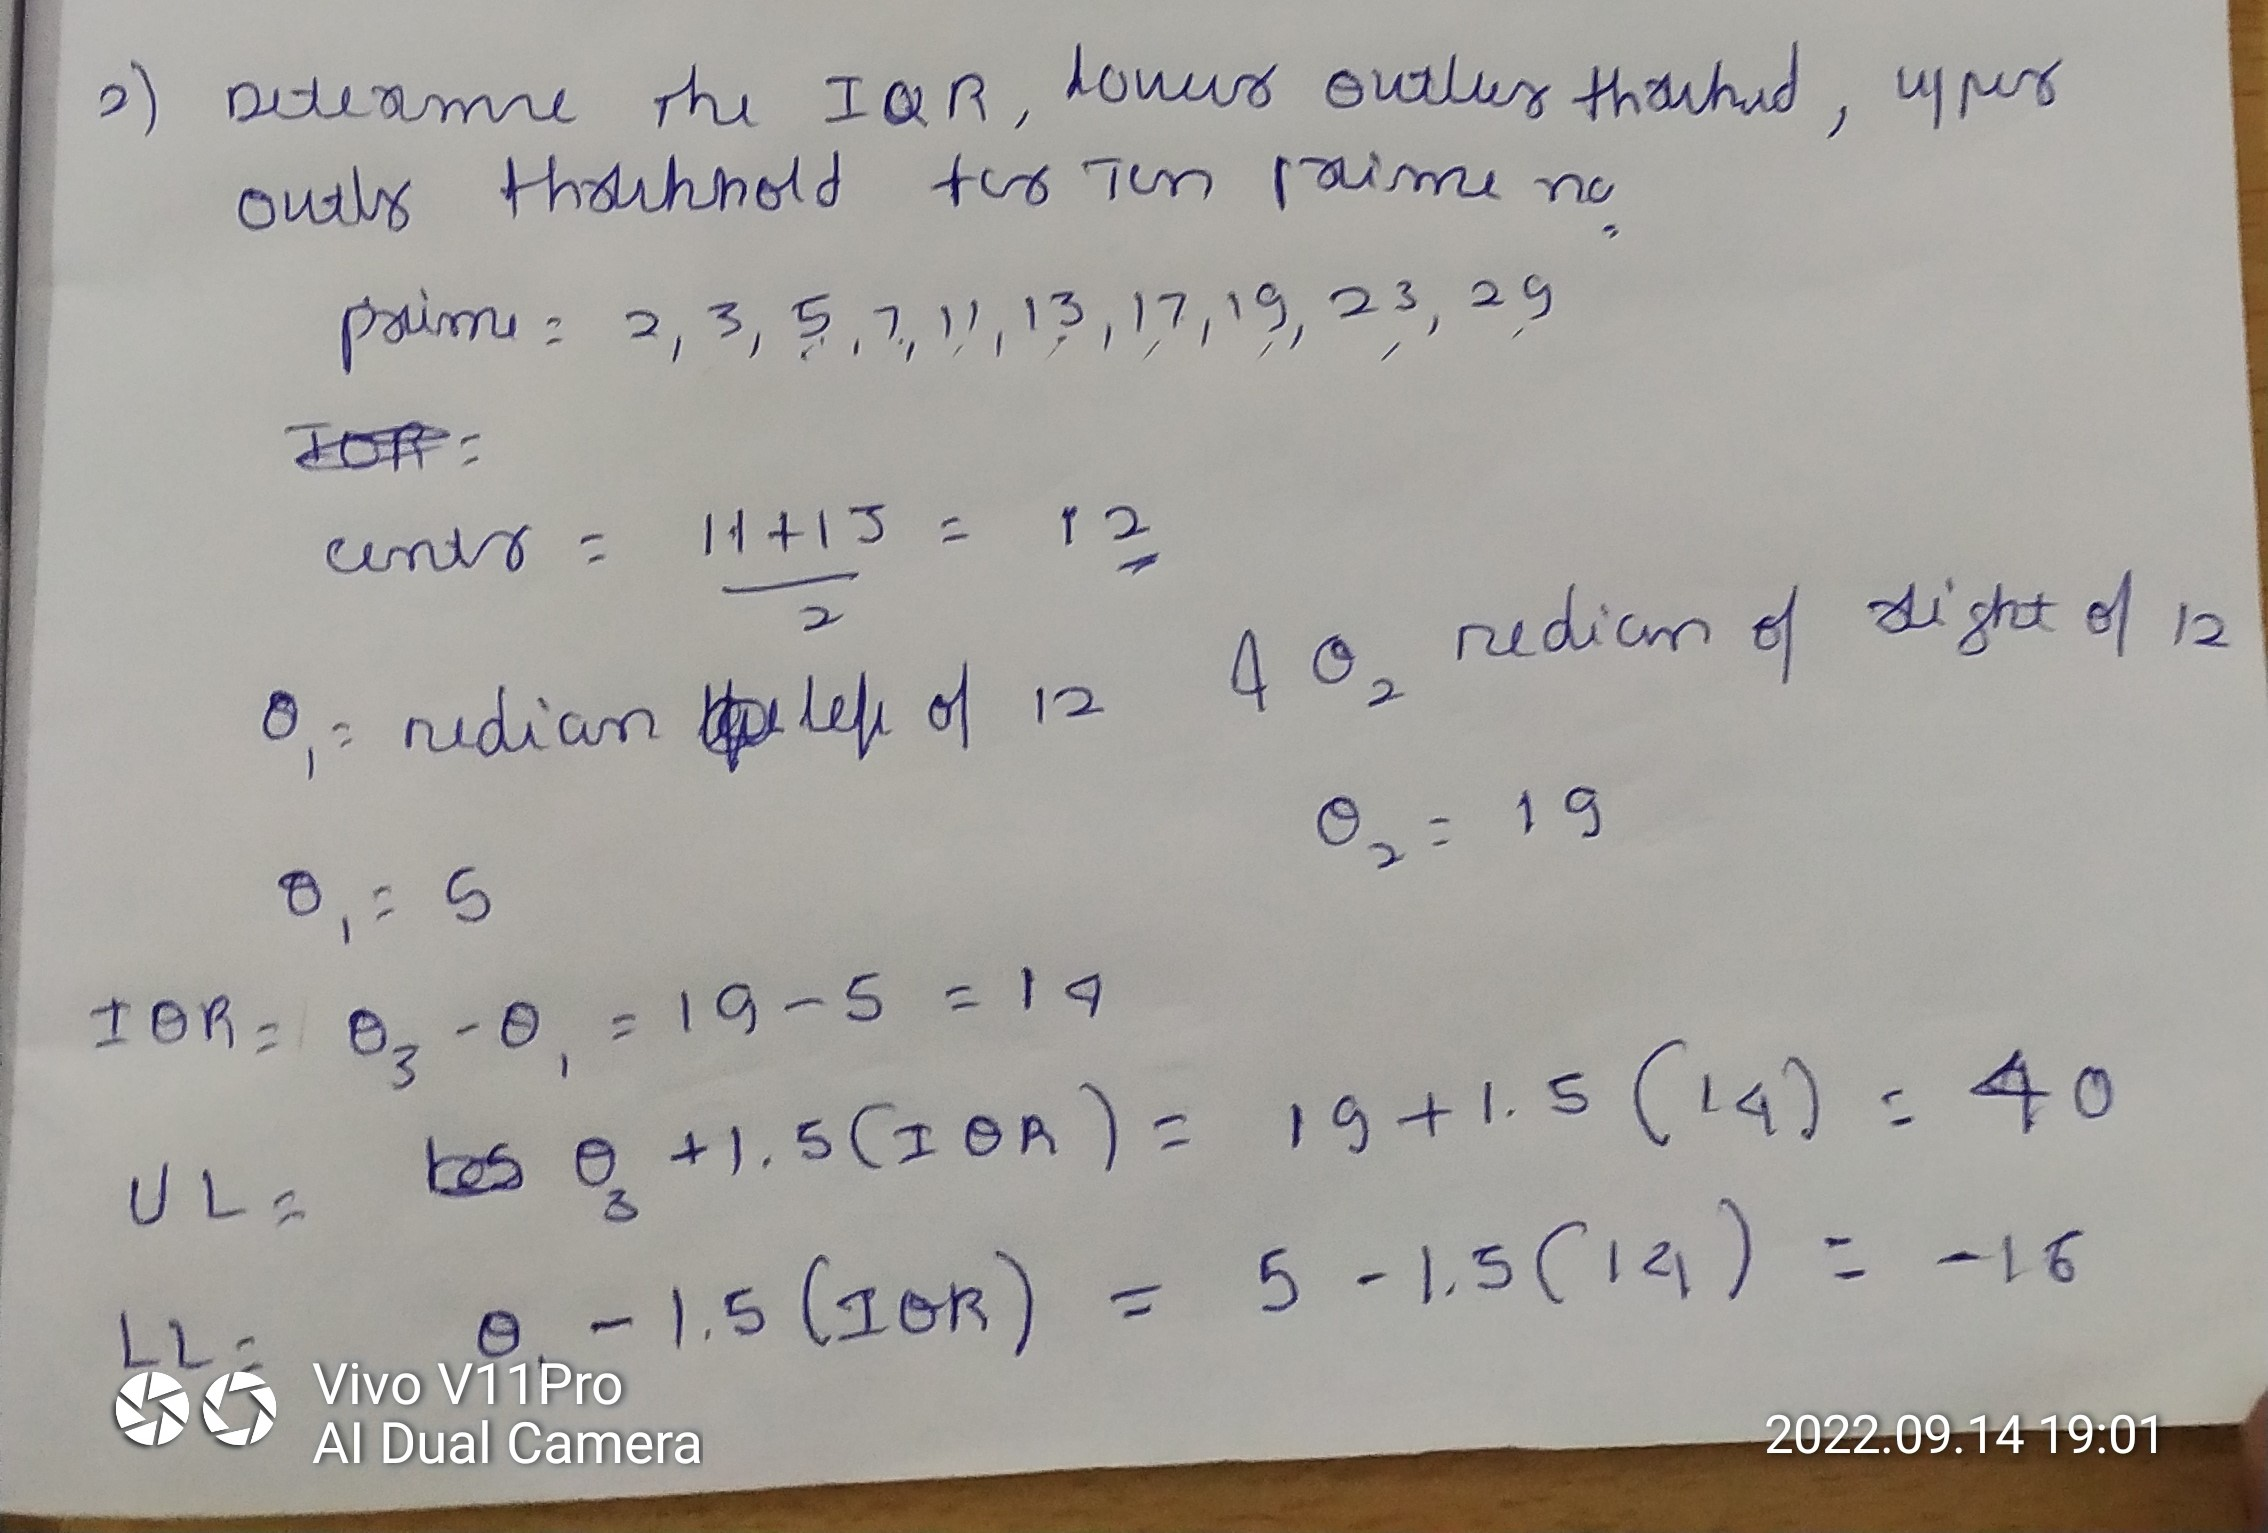Upload Your answer here.

# **MACHINE LEARNING**

## 7. What is the curse of dimensionality? Can you list some ways to deal with it?

The term "Curse of Dimensionality" refers to the exponential rise in computer work needed to process and/or analyse data due to its explosive nature as data dimensions increase. The algorithm where distance is utilised to determine the dependent variable ex=knn will be significantly impacted.

Using a separate unit of measurement for distance in a space vector is one technique to lessen the effects of high dimensions. Cosine similarity could potentially take the role of Euclidean distance. On data with higher dimensions, cosine similarity may have a less influence; other methods include pca and tsne.

## 8. How do L1 and L2 regularization differ in improving the accuracy of machine learning models? Implications of using each technique and which technique is commonly preferred to boost the model’s accuracy rate and why?


The obvious distinction between the two methods is that L2 regression enables us keep all the model's features while reducing overfitting alone. By bringing the coefficients for the least significant predictors very near to zero, it lowers the model's complexity. L1 regression pushes the coefficient estimates to exactly equal zero while assisting in decreasing the issue of overfitting in the model by deleting the extraneous features.
The undesirable traits are immediately eliminated by L1 regularisation. This is advantageous when there are a lot of feature points. L2 regularisation, however, offers a robust model that takes into account all the features while giving each one a moderate amount of weight, so the final model will compriseall independent variables, also known as predictors.
We cont tell which one is good based on dataset both techinique perform well.
